[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_03/blob/master/M03_A--High_Dimensional_Research_Assignment_Master.ipynb)

# High Dimensional Data

All of our work to this point is building dimensions on the bases of linear algebra and function analysis. This section involves studying some of the specific characteristics of high dimensionality that affect your analysis and data preparation.

1. High dimensional data cannot be intuited without modification
2. As dimensions increase, the number of choices explode
3. Selecting good data gets more difficult
4. In extremely high dimensional cases, only automated methods can be used.

In [0]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import matplotlib.pyplot as plt

(-1, 1)

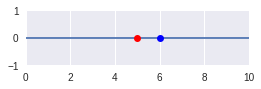

In [10]:
# 1d data

x = 5
y = 6

plt.figure(figsize=(4,1))
plt.axhline(0)
plt.plot(x,0,'ro')
plt.plot(y,0,'bo')
plt.plot((x+y)/2,'o',c="black")
plt.xlim((0,10))
plt.ylim((-1,1))

(0, 10)

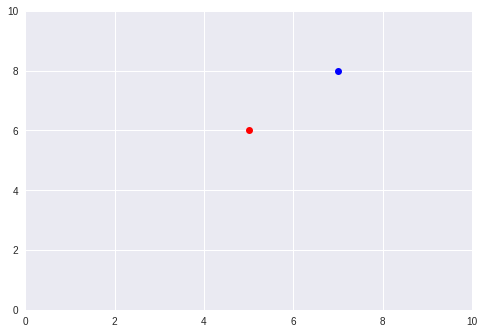

In [9]:
# 2d data

x = np.array([5,6])
y = np.array([7,8])

plt.plot(x[0],x[1],'ro')
plt.plot(y[0],y[1],'bo')
plt.xlim((0,10))
plt.ylim((0,10))

   x  y   z
0  5  6   7
0  8  9  10


(0, 10)

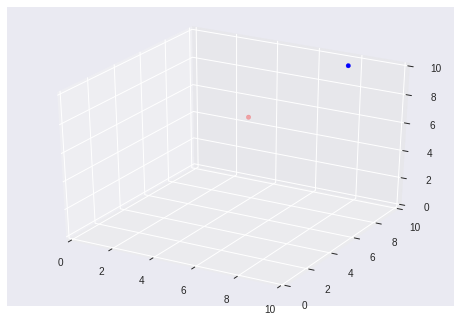

In [67]:
# 3d data
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

a = pd.DataFrame([5,6,7]).T
b = pd.DataFrame([8,9,10]).T
data = pd.concat([a,b])
data.columns = ['x','y','z']
print(data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['x'], data['y'], data['z'], c=['r','b'])
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,10)


# What about 4d?

We've played with high dimensional random datasets so far. Random data is random data, by and large, though we can create interesting datasets from it. Real data is better.

## Back to Titanic

In [0]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic = titanic.drop(['alive','adult_male','who','class','embark_town'], axis=1)
titanic['embarked'] = titanic['embarked'].fillna(method='ffill')
titanic = titanic.drop(['deck'], axis=1)
titanic['age'] = titanic['age'].fillna(method='ffill')


Any more NaN?
survived    False
pclass      False
sex         False
age         False
sibsp       False
parch       False
fare        False
embarked    False
alone       False
dtype: bool
   survived  pclass     sex   age  sibsp  parch     fare embarked  alone
0         0       3    male  22.0      1      0   7.2500        S  False
1         1       1  female  38.0      1      0  71.2833        C  False
2         1       3  female  26.0      0      0   7.9250        S   True
3         1       1  female  35.0      1      0  53.1000        S  False
4         0       3    male  35.0      0      0   8.0500        S   True


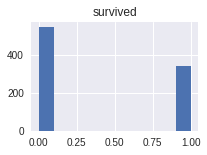

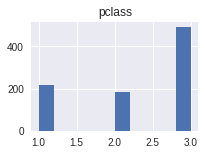

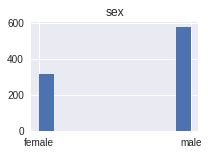

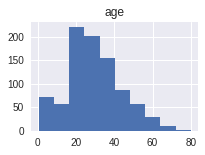

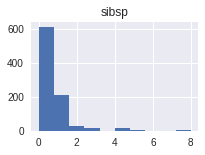

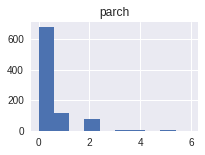

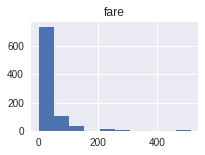

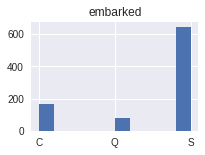

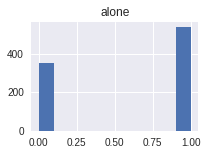

In [15]:
print('Any more NaN?')
print(titanic.isna().any())

print(titanic.head())

for col in titanic.columns:
    plt.figure(figsize=(3,2))
    titanic[col].hist()
    plt.title(col)
    plt.show()

Three binomials, two categoricals, and four numerical features.

In [0]:
from sklearn.preprocessing import LabelEncoder

# Convert binomials and categoricals to encoded labels
for label in ['embarked','sex']:
    titanic[label] = LabelEncoder().fit_transform(titanic[label])

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: survived, dtype: int64
0     red
1    blue
1    blue
1    blue
0     red
0     red
0     red
0     red
1    blue
1    blue
dtype: object


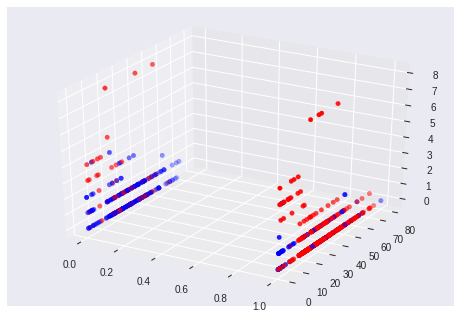

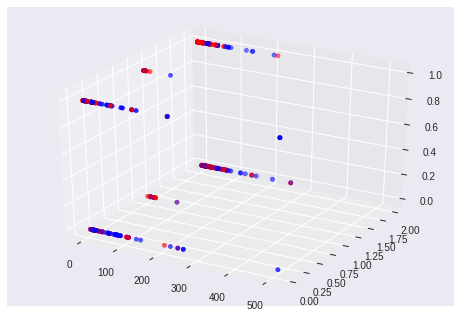

In [20]:
# 3d data
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

labels = titanic['survived']
features = titanic.drop(['survived'],axis=1)

# 0, red
# 1, blue
#["red","blue"][0, 1, 1, 1, 0, 0, 0, 0, 1, 1]
#["red", "red", "blue", "blue", "blue"]

# Convert labels to colors
colors = pd.Series(['red','blue'])[labels.values]
print(labels.head(10))
print(colors.head(10))

# Start graphing...
def plot3axes(data,axes):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[axes[0]], data[axes[1]], data[axes[2]], c=colors)

plot3axes(features,['sex','age','sibsp'])
plot3axes(features,['fare','embarked','alone'])

In [21]:
# separating the data by the category you want is huge

women = titanic[titanic['sex'] == 0]
men = titanic[titanic['sex'] == 1]
print(women.head(10))

    survived  pclass  sex   age  sibsp  parch     fare  embarked  alone
1          1       1    0  38.0      1      0  71.2833         0  False
2          1       3    0  26.0      0      0   7.9250         2   True
3          1       1    0  35.0      1      0  53.1000         2  False
8          1       3    0  27.0      0      2  11.1333         2  False
9          1       2    0  14.0      1      0  30.0708         0  False
10         1       3    0   4.0      1      1  16.7000         2  False
11         1       1    0  58.0      0      0  26.5500         2   True
14         0       3    0  14.0      0      0   7.8542         2   True
15         1       2    0  55.0      0      0  16.0000         2   True
18         0       3    0  31.0      1      0  18.0000         2  False


# Assignment in 8D

* Calculate the centroid of the survivors.
* Calculate the centroid of the casualties.
* Calculate the average distance between each survivor.
* Calculate the average distance between each casualty.
* Calculate the distance between the two centroids. Which is farthest? Which is nearest?


# Stretch Goal

## Automate it: Find the optimal set of dimensions

* Automate this: Find the set of dimensions where: the mean distance between each survivor and the mean distance between each casualty is less than the distance.

The set of dimensions that maximizes centroid distance and minimizes the cluster distances is the "best" dataset. Or is it? Why do we need the other dimensions? What if we have 30 dimensions and not just 8? What if there is no optimal clustering arrangement?

In [56]:
thetas = np.linspace(0,360,50)

def init():
    points.set_data([], [])
    return (points,)

def animate(i):
    v = thetas[i]
    
    # doesn't work for 2d animation - too many points
    #points.set_data(data.loc[0],data.loc[1],data.loc[2])
    points.set_data([ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data])
    #points.set_data(data.loc[0],data.loc[1])
    return (points,)

fig = plt.figure()
ax = p3.Axes3D(fig)

ax.set_xlim((0,10))
ax.set_ylim((0,10))
ax.set_zlim((0,10))

# doesn't work for 3d animation - not iterable?
points, = ax.scatter3D([], [], [], c=['r','b'])
print(points)

#points, = ax.plot([], [], c=['r','b'])

TypeError: ignored

NameError: ignored

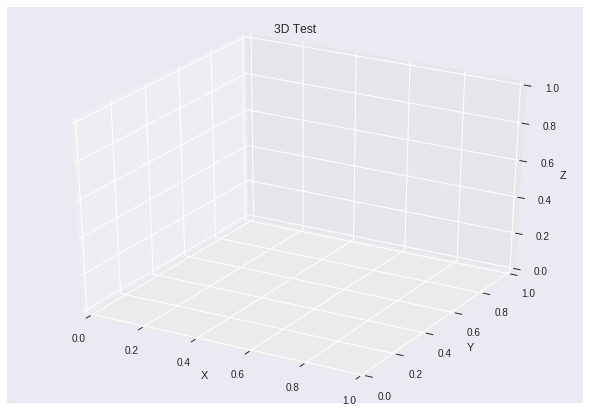

In [61]:
"""
============
3D animation
============

A simple example of an animated plot... In 3D!
"""
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from matplotlib import rc

def update_lines(num, dataLines, lines):
    line.set_data(data[0,0:2],data[1,0:2])
    line.set_3d_properties(data[0][2],data[1][2])
    """
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines
    """

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 50, fargs=(data, lines),
                                   interval=100, blit=False)
rc('animation', html='jshtml')
line_ani

In [48]:
from matplotlib import animation, rc
from IPython.display import HTML

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(thetas), interval=100)
rc('animation', html='jshtml')
anim